In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### The Novel Chaotic Oscillator defined as
$$
\begin{aligned}
    \dot{x} = y  \\
    \dot{y} = x  \\
    \dot{z} = ax - y - 0.7z - 0.9y^2 -& 0.7z^2 + 0.3xy + cxz + byz
\end{aligned}
$$

In [2]:
def Novel(x0, y0, z0, a, b, c, num_steps):
    dt= 0.01
    x = np.empty(num_steps+1)
    y = np.empty(num_steps+1)
    z = np.empty(num_steps+1)

    x[0] = x0
    y[0] = y0
    z[0] = z0
    
    for i in range(num_steps):
        x[i+1] = x[i] + y[i]*dt
        y[i+1] = y[i] + z[i]*dt
        z[i+1] = z[i] + (a*x[i] - y[i] - 0.7*z[i] - 0.9*(y[i])**2 - 0.7*(z[i])**2 + 0.3*x[i]*y[i] + c*x[i]*z[i] + b*y[i]*z[i])*dt

    return x, y, z

### Analysing the variation of the variables in space

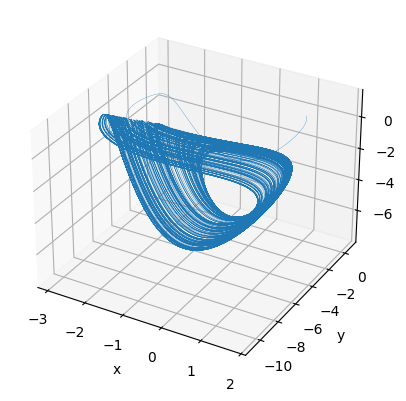

In [29]:
x, y, z = Novel(0, 1, 0, -0.7, 2.7, 0.3, 100000)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(y, x, z, lw=0.2)
# ax.set_title('3D line plot geeks for geeks')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Text(0, 0.5, 'z')

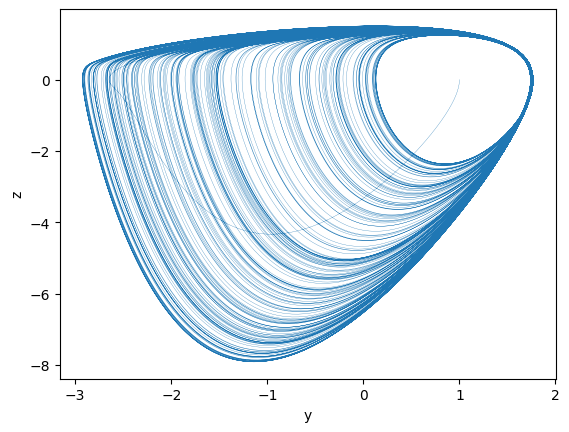

In [30]:
plt.plot(y, z, lw=0.2)
plt.xlabel('y')
plt.ylabel('z')

Text(0, 0.5, 'z')

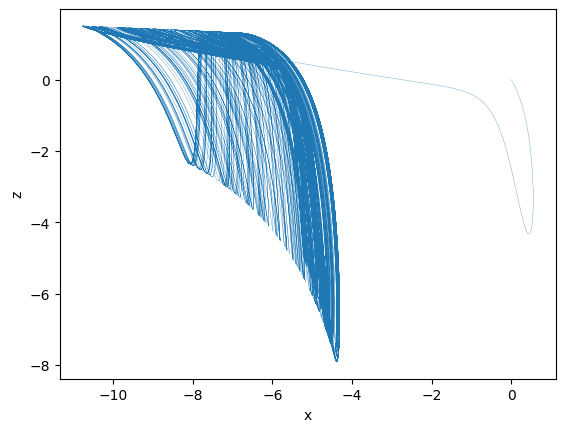

In [31]:
plt.plot(x, z, lw=0.2)
plt.xlabel('x')
plt.ylabel('z')

Text(0, 0.5, 'y')

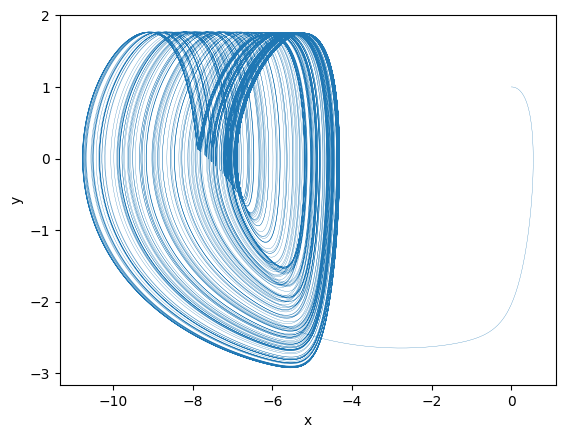

In [32]:
plt.plot(x, y, lw=0.2)
plt.xlabel('x')
plt.ylabel('y')

### Analysing Stability
Checking the evolution of x for varying values of parameter 'a'

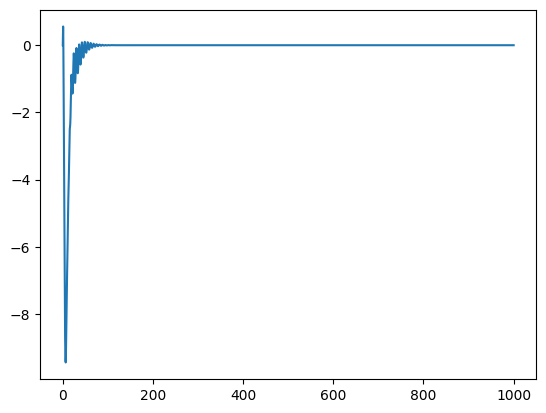

In [16]:
x, y, z = Novel(0, 1, 0, -0.5, 2.7, 0.3, 100000)
plt.plot(np.arange(0, 100001)*0.01, x)

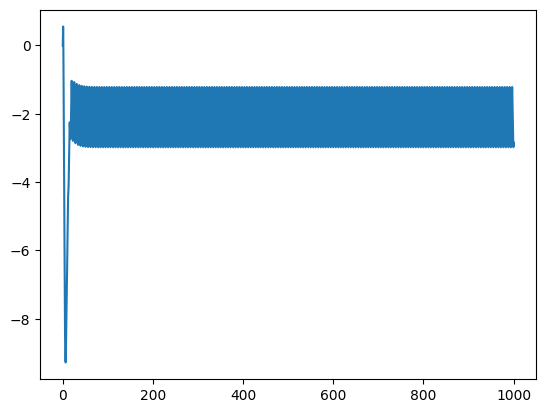

In [17]:
x, y, z = Novel(0, 1, 0, -0.54, 2.7, 0.3, 100000)
plt.plot(np.arange(0, 100001)*0.01, x) 

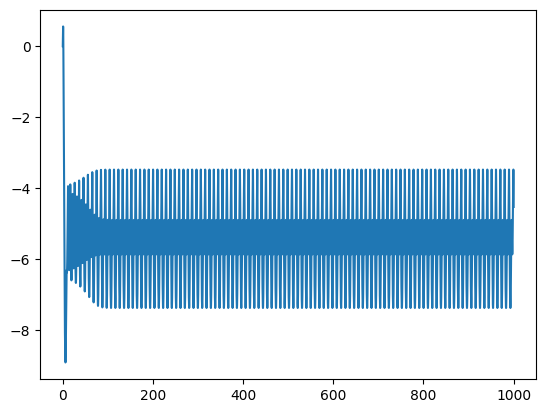

In [18]:
x, y, z = Novel(0, 1, 0, -0.65, 2.7, 0.3, 100000)
plt.plot(np.arange(0, 100001)*0.01, x)

### Calculating the Lyapunov Exponent using the deviation slope method

In [24]:
x, y, z = Novel(0, 1, 0, -0.702, 2.7, 0.3, 100000)
x_dev, y_dev, z_dev = Novel(10e-15, 1, 0, -0.702, 2.7, 0.3, 100000)
delt = []
# np.log
for i in range(100001):
    delt.append(np.log(np.sqrt((x_dev[i]-x[i])**2 + (y_dev[i]-y[i])**2 + (z_dev[i]-z[i])**2)))

In [25]:
def func(x, a, b):
    return a*x + b

parameters, cov_matrix = curve_fit(func, np.arange(0, 30000)*0.01, delt[:30000])

Text(0, 0.5, 'Distance (log scale)')

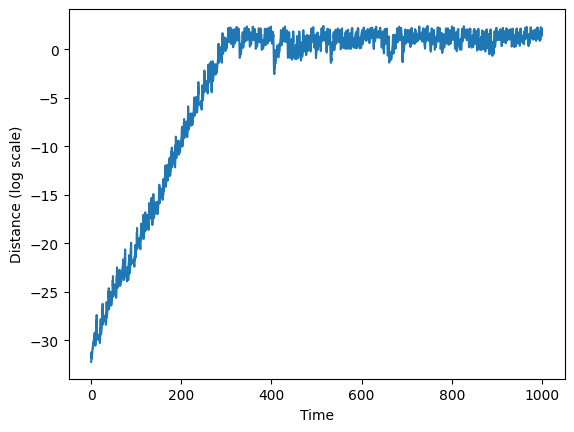

In [26]:
plt.plot(np.arange(0, 100001)*0.01, delt)
plt.xlabel('Time')
plt.ylabel('Distance (log scale)')

Text(0, 0.5, 'Distance (log scale)')

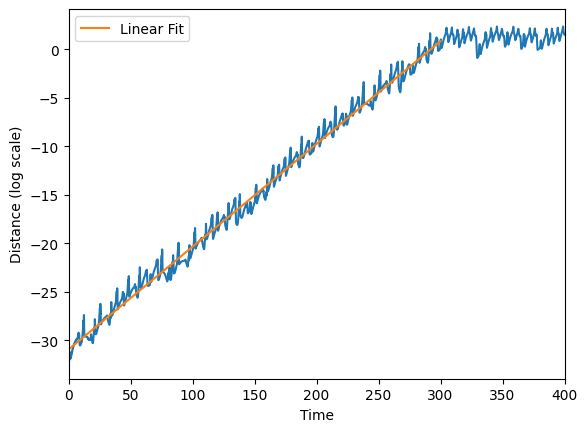

In [27]:
plt.plot(np.arange(0, 100001)*0.01, delt)
plt.plot(np.arange(0, 30000)*0.01, parameters[0]*np.arange(0, 30000)*0.01 + parameters[1], label='Linear Fit')
plt.xlim(0, 400)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance (log scale)')

#### Lyapunov Exponent obtained

In [28]:
parameters[0] 

0.10599606642627474

### The Image Encryption Scheme

In [34]:
import cv2

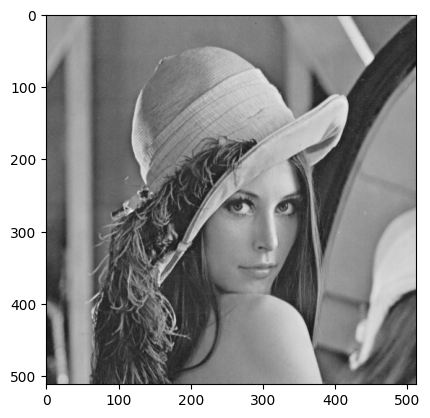

In [35]:
img = cv2.imread(r"C:\Users\apram\Downloads\lena_final.bmp") # Obtaining the image
plt.imshow(img) 

### Functions for carrying out the PRNG Mechanism

In [37]:
def seq(X): 
    return np.floor((X*10e12)%256)
def PRNG(x_0, y_0, z_0, a, b, c, R, C, N):
    X, Y, Z = Novel(x_0, y_0, z_0, a, b, c, (R*C*N)-1)
    Sx = seq(X)
    Sy = seq(Y)
    Sz = seq(Z)
    Sx = Sx.astype(np.int32)
    Sy = Sy.astype(np.int32)
    Sz = Sz.astype(np.int32)
    return Sx^Sy^Sz


### Obtaining the Shape and the initial conditions

In [36]:
[R, C, N] = img.shape
x_0, y_0, z_0, a, b, c = -0.2851, 0.7692, 0.617, -0.7, 2.7, 0.3

In [39]:
K = PRNG(x_0, y_0, z_0, -0.7, 2.7, 0.3, R, C, N) # Getting the PRNG Sequence

In [40]:
K1 = K.reshape(R, C, N) # Reshaping for subsitution

In [41]:
SG = img^K1 # XOR for substituting the image

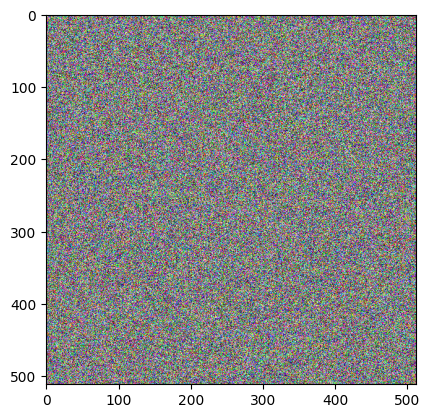

In [42]:
plt.imshow(SG)
plt.show()

### Obtaining relevent information from the substituted image

In [43]:
s = 0
for i in range(R):
    for j in range(C):
        for k in range(N):
            n = (SG[i][j][k])
            s += n
beta = (s%512)/512

### Updating the initial conditions for further use

In [45]:
x_n = (x_0 + beta)/2
y_n = (y_0 + beta)/2
z_n = (z_0 + beta)/2

In [48]:
X, Y, Z = Novel(x_n, y_n, z_n, a, b, c, (R*C*N)-1)

### Functions for generating 'R' dissimilar elements from an array 'H'

In [49]:
def unique(H, R):
    arr = []
    for i in range(len(H)):
        k=0
        for j in range(i):
            if H[i]==H[j]:
                k+=1
        if k==0:
            arr.append(H[i])
        if len(arr) == R:
            break
    
    return arr

In [50]:
H = np.floor(((X+Z)*10e12)%R)

### Carring out the Permutation process

In [51]:
PerH = unique(H, R)

In [52]:
PerH = np.array(PerH).astype(np.int32)

In [53]:
W = np.floor(((Y+Z)*10e12)%C) 

In [54]:
PerW = unique(W, C)

In [55]:
PerW = np.array(PerW).astype(np.int32)

In [56]:
PerG = np.zeros(shape=[R, C, N])

In [57]:
for t in range(R):
    for u in range(C):
        PerG[t][u][:] = SG[PerH[t]][PerW[u]][:]

In [58]:
PerG = PerG.astype(np.int32)

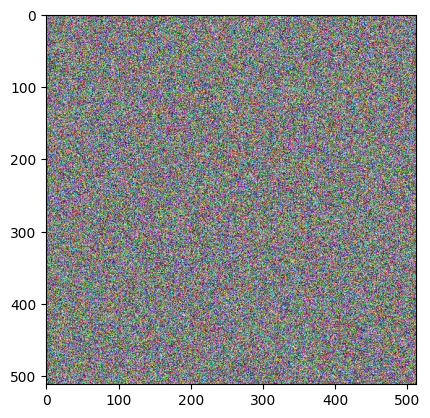

In [59]:
plt.imshow(PerG)

### Carrying out the S-box mechanism

In [60]:
S1 = PRNG(x_n, y_n, z_n, -0.7, 2.7, 0.3, R, C, N)

In [61]:
SB = unique(S1, 256)

In [62]:
CG = np.zeros(shape=[R, C, N])
for t in range(R):
    for u in range(C):
        for v in range(N):
            CG[t, u, v] = SB[PerG[t, u, v]]

In [63]:
CG_final = CG.astype('uint32')

### Final output

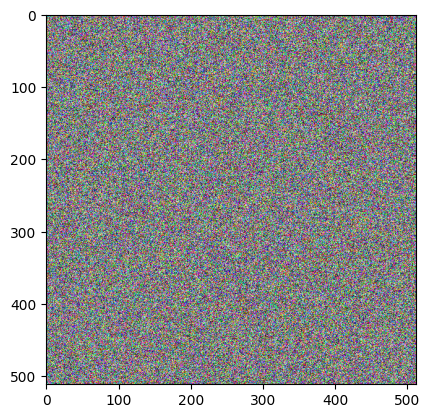

In [64]:
plt.imshow(CG_final)

### The Decryption Scheme
We do the encrption scheme in reverse with the relevent paramters to obtain the original image back

In [65]:
[R, C, N] = CG_final.shape

In [66]:
x_g, y_g, z_g = Novel(x_n, y_n, z_n, a, b, c, (R*C*N)-1)

In [67]:
S1_g = PRNG(x_n, y_n, y_n, -0.7, 2.7, 0.3, R, C, N)
SB_g = unique(S1, 256)

In [68]:
PerG_g = np.zeros(shape=[R, C, N], dtype=np.uint64)

In [69]:
SB_g = np.array(SB_g)

In [70]:
for t in range(R):
    for u in range(C):
        for v in range(N):
            PerG_g[t, u, v] = np.where(SB_g == CG[t, u, v])[0][0]

In [71]:
H_g = np.floor(((x_g+z_g)*10e12)%R)
PerH_g = unique(H, R)
PerH_g = np.array(PerH_g).astype(np.int32)
W_g = np.floor(((y_g+z_g)*10e12)%C)
PerW_g = unique(W, C)
PerW_g = np.array(PerW_g).astype(np.int32)


In [72]:
SG_g = np.zeros(shape=[R, C, N], dtype=np.uint64)

In [73]:
for t in range(R):
    for u in range(C):
        SG_g[PerH_g[t], PerW_g[u], :] = PerG_g[t, u, :]

In [74]:
K_g = PRNG(x_0, y_0, z_0, -0.7, 2.7, 0.3, R, C, N)
K1_g = K_g.reshape(R, C, N)

In [75]:
K1_g = K1_g.astype("uint64")

In [76]:
DG = SG_g^K1_g

### Final Output

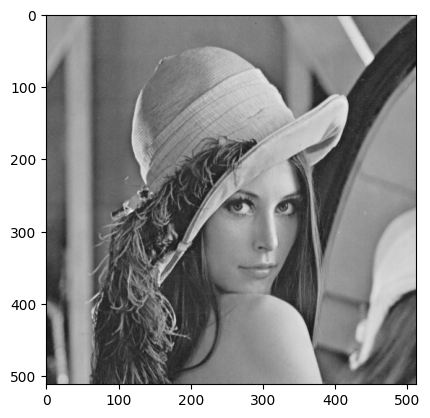

In [77]:
plt.imshow(DG)